### Background

This Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:

1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

The Work-Life Balance Score is the total of all five categories: a poor score is below 550, a good score is above 680, an excellent score is above 700.

How can we reinvent our lifestyles to optimize our individual wellbeing while supporting the UN Sustainable Development Goals?

### Problem Statement
Determine if one has low or high stress levels based on their lifestyle habits and social connections

### Hypothesis
Our lifestyle habits and social interactions affect our stress levels.

### Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import survey responses data
lifestyle_n_wellbeing_pdf = pd.read_csv("lifestyle-and-wellbeing/Wellbeing_and_lifestyle_data_Kaggle.csv")
lifestyle_n_wellbeing_pdf.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


#### Description of columns from survey
| Column | Description | Range |
| --- | --- | --- |
| Timestamp | Date when survey was completed | 7 Jul 2015 to 14 Mar 2021 |
| FRUITS_VEGGIES | How many fruits or vegetables do you eat everyday? <br> In a typical day, averaging workdays and weekends. | 0 to 5 servings or more per day |
| DAILY_STRESS | How much stress do you typically experience everyday? <br> At work or at home, due to the environment (noise, pollution, insecurity...), your co-workers or boss, or because of tragic events such as divorce, job loss, serious illness, loss of family or friends,... <br> In average over 12 months | 0 (Not much stress) to 5 (A lot of stress) |
| PLACES_VISITED | How many new places do you visit? <br> Over a period of 12 months. Include new states, new cities as well as museum, places of interest and parks in your neighborhood.| 0 to 10 new places or more | 
| CORE_CIRCLE | How many people are very close to you? <br> i.e. close family and friends ready to provide you with a long-term unconditional support.|
| SUPPORTING_OTHERS | How many people do you help achieve a better life? <br> A reflection of your altruism or selflessness (see the TED video from Matthieu Ricard 'How to let altruism be your guide') <br> e.g.: caring for your family, actively supporting a friend, mentoring, coaching, developing or promoting a co-worker, ... <br> Over a period of 12 months | 0 to 10 people or more |
| SOCIAL_NETWORK | With how many poeple do you interact with during a typical day? <br> True interactions and dialogues at home, at work, at the gym, ... <br> Average of workdays and weekends| 0 to 10 persons or more |
| ACHIEVEMENT | How many remarkable achievements are you proud of? <br> Over the last 12 months, personal achievements known to your family, close friends or co-workers such as: running a marathon or important race, birth, successful kids, new house or major renovation, major success at work, opening a new business, ...| 0 to 10 achievements or more |
| DONATION | How many times do you donate your time or money to good causes? <br> Over a period of 12 months. Include financial donation, your time contribution, fundraising, volunteering, serving your country and the poor, ...| 0 to 5 or more |
| BMI_RANGE | What is your BMI range? | 1 (Below 25) to 2 (Above 25) |
| TODO_COMPLETED |How well do you complete your weekly to-do lists? <br> Include your weekly goals, work- and personal-related tasks.| 0 (not at all) to 10 (very well) |
| FLOW | In a typical day, how many hours do you experience "flow"? <br> 'Flow' is defined as the mental state, in which you are fully immersed in performing an activity. You then experience a feeling of energized focus, full involvement, and enjoyment in the process of this activity.| 0 to 10 hours per day |
| DAILY_STEPS | How many steps (thousands) do you typically walk everyday? <br> Thousand steps, daily average over multiple days including work days and week-end. | 1 (Less than 1000 steps) to 10 (10000 steps|
| LIVE_VISION | For how many years ahead is your life vision very clear for? <br> For instance, illustrated in a vision board, detailed in a personal journal or openly discussed with your spouse or close friends.| 0 (I do not have a live vision) to 10 years or more |
| SLEEP_HOURS | About how long do you typically sleep? <br> Over the course of a typical working week, including week-end| 1 to 10 hours per night |
| LOST_VACATION | How many days of vacation do you typically lose every year? <br> Unused vacation days, lost or carried forward into the following year. <br> Or because of work stress during your vacation. | 0 to 10 vacation days |
| DAILY_SHOUTING | How often do you shout or sulk at somebody? <br> In a typical week <br> Expressing your negative emotions in an active or passive manner.| 0 (Never) to 10 times per week or more |
| SUFFICIENT_INCOME | How sufficient is your income to cover basic life expenses? <br> Such as the costs of housing, food, health care, car and education.| 1 (Not or hardly sufficient) to 2 (Sufficient) |
| PERSONAL_AWARDS | How many recognitions have you received in your life? <br> Significant public recognitions validating a personal level of expertise and engagement <br> E.g.: diploma, degree, certificate, accreditation, award, prize, published book, presentation at major conference, medals, cups, titles... | 0 to 10 recognitions or more |
| TIME_FOR_PASSION | How many hours do you spend everyday doing what you are passionate about? <br> Daily hours spent doing what you are passionate and dreaming about, and/or contributing to a greater cause: health, education, peace, society development, ...| 0 to 10 hours |
| WEEKLY_MEDITATION | In a typical week, how many times do you have the opportunity to think about yourself? <br> Include meditation, praying and relaxation activities such as fitness, walking in a park or lunch breaks.| 0 to 10 times per week or more often |
| AGE | Age groups | Less than 20, 21 to 35, 36 to 50, 51 or more|
| GENDER | Male or female | - |
| WORK_LIFE_BALANCE_SCORE | Score calculated by authentic-happiness.com algorithm and reported to user in the first report| Poor score: below 550 <br> Good score: above 680 <br> Excellent score: above 700|

In [3]:
lifestyle_n_wellbeing_pdf.info()
# 15972 responses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [4]:
# Drop WORK_LIFE_BALANCE_SCORE because it is calculated from the other columns
lifestyle_n_wellbeing_pdf = lifestyle_n_wellbeing_pdf.drop(columns=["WORK_LIFE_BALANCE_SCORE"])

In [5]:
# Zoom into the object columns
lifestyle_n_wellbeing_pdf["DAILY_STRESS"].value_counts()
# 1 invalid value of 1/1/00

3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: DAILY_STRESS, dtype: int64

In [6]:
# Remove the invalid response
lifestyle_n_wellbeing_pdf = lifestyle_n_wellbeing_pdf[lifestyle_n_wellbeing_pdf["DAILY_STRESS"] != "1/1/00"]
lifestyle_n_wellbeing_pdf["DAILY_STRESS"] = lifestyle_n_wellbeing_pdf["DAILY_STRESS"].astype(int)

In [7]:
lifestyle_n_wellbeing_pdf["AGE"].value_counts()

21 to 35        6107
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: AGE, dtype: int64

In [8]:
lifestyle_n_wellbeing_pdf["GENDER"].value_counts()

Female    9858
Male      6113
Name: GENDER, dtype: int64

In [9]:
lifestyle_n_wellbeing_pdf.isnull().sum()
# No nulls

Timestamp            0
FRUITS_VEGGIES       0
DAILY_STRESS         0
PLACES_VISITED       0
CORE_CIRCLE          0
SUPPORTING_OTHERS    0
SOCIAL_NETWORK       0
ACHIEVEMENT          0
DONATION             0
BMI_RANGE            0
TODO_COMPLETED       0
FLOW                 0
DAILY_STEPS          0
LIVE_VISION          0
SLEEP_HOURS          0
LOST_VACATION        0
DAILY_SHOUTING       0
SUFFICIENT_INCOME    0
PERSONAL_AWARDS      0
TIME_FOR_PASSION     0
WEEKLY_MEDITATION    0
AGE                  0
GENDER               0
dtype: int64

In [10]:
lifestyle_n_wellbeing_pdf.describe()
# Values in each columns are ordinal.

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,2.922672,2.791685,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,3.194477,5.703588,3.752176,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611
std,1.442739,1.367801,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,2.357285,2.891102,3.231083,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000
75%,4.000000,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000


#### Healthy Body

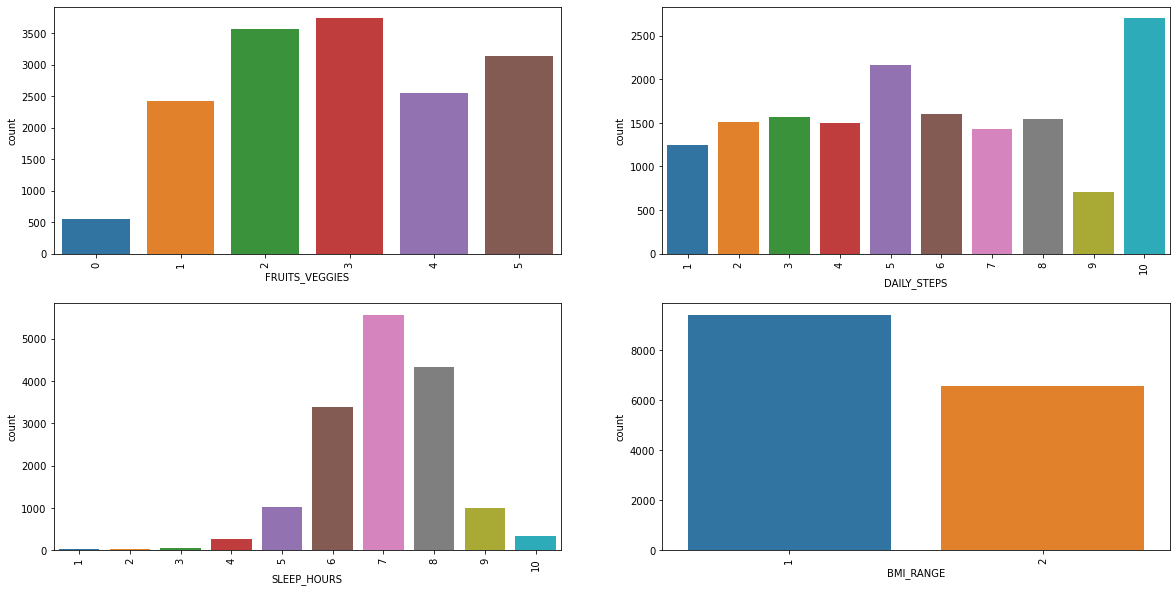

In [11]:
cols_to_plot = ["FRUITS_VEGGIES", "DAILY_STEPS", "SLEEP_HOURS", "BMI_RANGE"]
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(cols_to_plot, ax.flatten()):
    sns.countplot(x=lifestyle_n_wellbeing_pdf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
# FRUITS_VEGGIES: Most respondents are eating sufficient fruits and veggies.
# DAILY_STEPS: Quite a lot of respondents walked 10k steps daily.
# SLEEP_HOURS: Most respondents have minimally 4 hours of sleep, with the most having 7 hours of sleep
#              => Majority are well-rested
# BMI_RANGE: Most of the respondents have a BMI range below 25.

#### Healthy Mind

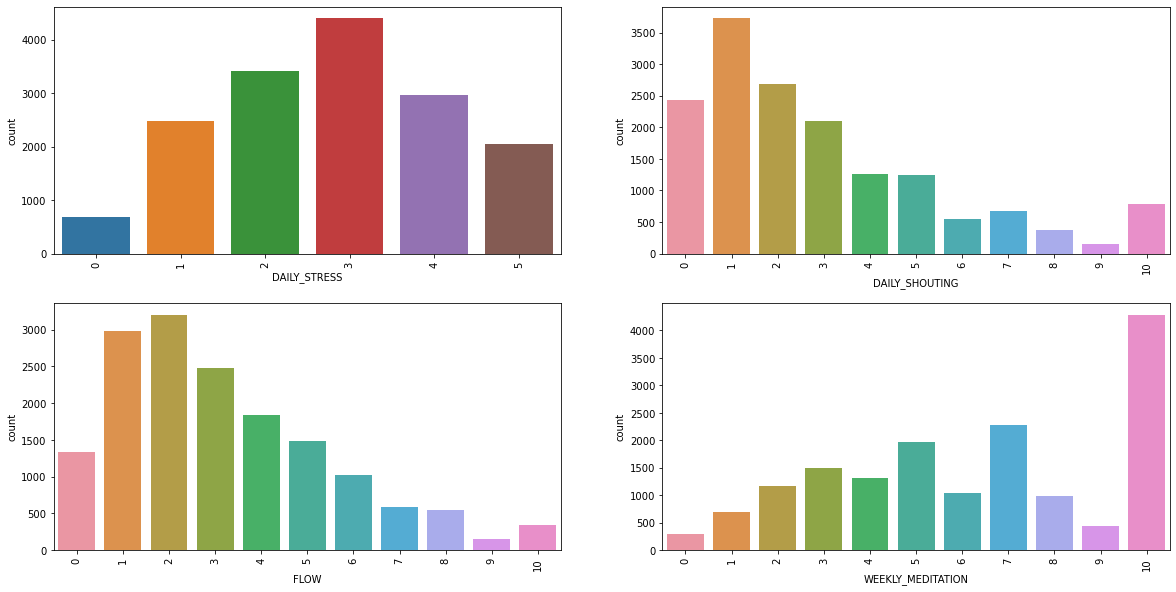

In [12]:
cols_to_plot = ["DAILY_STRESS", "DAILY_SHOUTING", "FLOW", "WEEKLY_MEDITATION"]
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(cols_to_plot, ax.flatten()):
    sns.countplot(x=lifestyle_n_wellbeing_pdf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
# DAILY_STRESS: Similar to a normal distribution, with most having an average level of 3.
# DAILY_SHOUTING: Not a lot of people shout or sulk at someone, most only do it once per week.
# FLOW: Distribution similar to DAILY_SHOUTING, most having less than 5 hours of flow time.
# WEEKLY_MEDITATION: Respondents do a lot of mediation or have time to relax and enjoy weekly.

#### Expertise

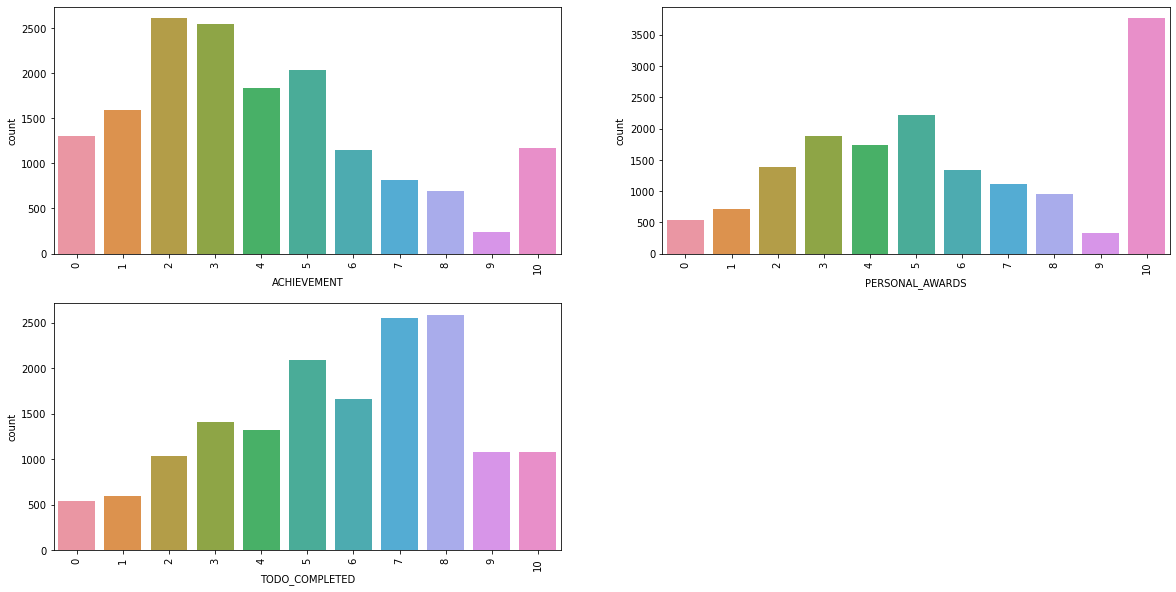

In [13]:
cols_to_plot = ["ACHIEVEMENT", "PERSONAL_AWARDS", "TODO_COMPLETED"]
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.delaxes(ax[1][1])
for variable, subplot in zip(cols_to_plot, ax.flatten()):
    sns.countplot(x=lifestyle_n_wellbeing_pdf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
# ACHIEVEMENT: Most have around 0 to 5 achievements.
# PERSONAL_AWARDS: High proportion of the respondents have 10 personal awards.
# TODO_COMPLETED: Most respondents complete their to-do list well.

#### Connection

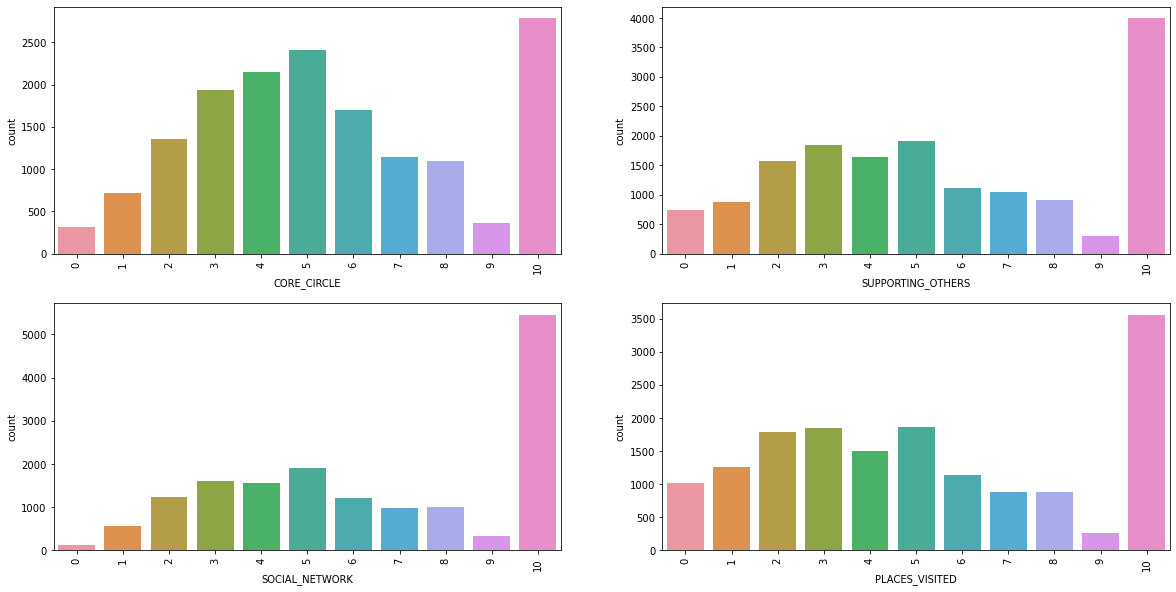

In [14]:
cols_to_plot = ["CORE_CIRCLE", "SUPPORTING_OTHERS", "SOCIAL_NETWORK", "PLACES_VISITED"]
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(cols_to_plot, ax.flatten()):
    sns.countplot(x=lifestyle_n_wellbeing_pdf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Respondents have high connection, be it with people or places they visited.

#### Meaning

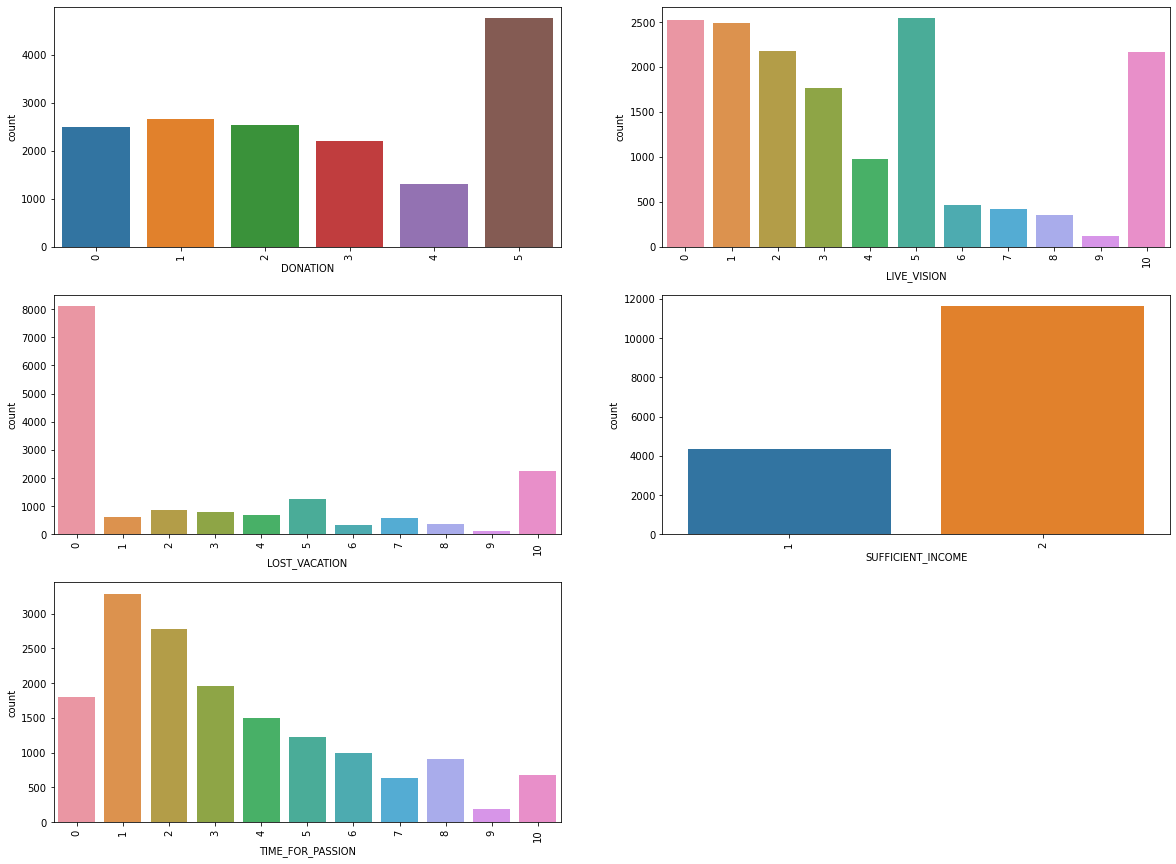

In [15]:
cols_to_plot = ["DONATION", "LIVE_VISION", "LOST_VACATION", "SUFFICIENT_INCOME", "TIME_FOR_PASSION"]
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.delaxes(ax[2][1])
for variable, subplot in zip(cols_to_plot, ax.flatten()):
    sns.countplot(x=lifestyle_n_wellbeing_pdf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
# DONATION: Respondents are generous.
# LIVE_VISION: Most respondents do not have a very clear vision of the future.
# LOST_VACATION: Most do not have lost vacation i.e. they do take their time off for vacation.
# SUFFICIENT_INCOME: Most respondents are satisfied with their income.
# TIME_FOR_PASSION: Most respondents spent a few hours on their passion.

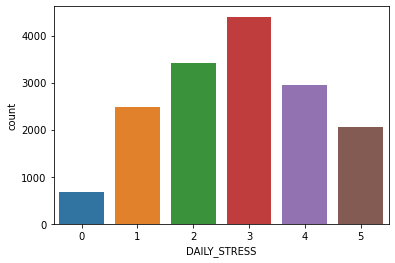

In [16]:
# Look at the stress levels distribution
sns.countplot(data=lifestyle_n_wellbeing_pdf, x="DAILY_STRESS");
# A normal distribution

In [17]:
# To predict whether one has low or high stress levels, group the stress levels into 2 classes
# i.e. Low stress levels => 0 to 2 and high stress levels => 3 to 5
lifestyle_n_wellbeing_pdf["HIGH_STRESS_LEVELS"] = lifestyle_n_wellbeing_pdf["DAILY_STRESS"].map(lambda x: 1 if x > 2 else 0)
lifestyle_n_wellbeing_pdf = lifestyle_n_wellbeing_pdf.drop(columns=["DAILY_STRESS"])

In [18]:
lifestyle_n_wellbeing_pdf["HIGH_STRESS_LEVELS"].value_counts(normalize=True)
# Around 59% of responses have high stress level and 41 % have low stress level - the 2 classes are quite balanced.

1    0.589193
0    0.410807
Name: HIGH_STRESS_LEVELS, dtype: float64

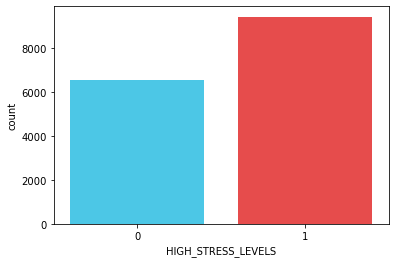

In [19]:
# View the number of people with low vs high stress levels
sns.countplot(data=lifestyle_n_wellbeing_pdf, x="HIGH_STRESS_LEVELS", palette={0: "#33d6ff", 1: "#f33"});
# More respondents have high stress levels

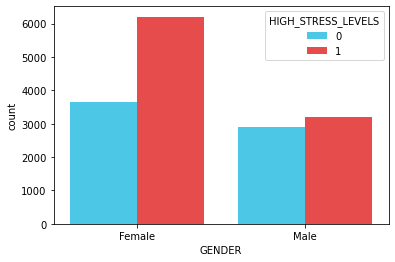

In [20]:
# Within each group, how is the split like for each gender?
sns.countplot(data=lifestyle_n_wellbeing_pdf, x="GENDER", hue="HIGH_STRESS_LEVELS", palette={0: "#33d6ff", 1: "#f33"});
# Males are pretty balanced in both low and high stress levels groups but we have much more females 
# in the high stress levels group.

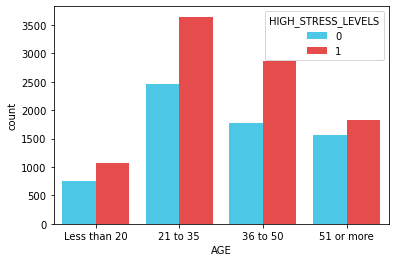

In [21]:
# Within each group, how is the split like for each age range?
sns.countplot(data=lifestyle_n_wellbeing_pdf, x="AGE", hue="HIGH_STRESS_LEVELS",
              order=["Less than 20", "21 to 35", "36 to 50", "51 or more"],
              palette={0: "#33d6ff", 1: "#f33"});
# Across each age group, we see that less than 20 years old and 51 or more are pretty equal in both low and high stress levels
# For the 2 groups, 21 to 50, we see a much high number of people in the high stress levels group. => because of work?

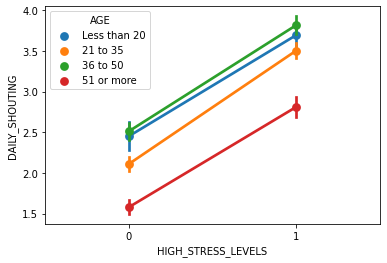

In [22]:
# Does shouting affect stress levels? Which age group shouts and sulks more?
sns.pointplot(data=lifestyle_n_wellbeing_pdf, x="HIGH_STRESS_LEVELS", y="DAILY_SHOUTING", hue="AGE",
             hue_order=["Less than 20", "21 to 35", "36 to 50", "51 or more"]);
# The younger respondents shout and sulk more.
# The higher the frequency of daily shouting, the higher the chance of having high stress levels.

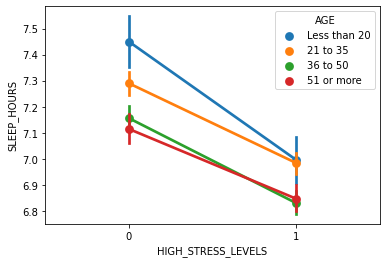

In [23]:
# Less sleep, more cranky => Higher stress levels?
sns.pointplot(data=lifestyle_n_wellbeing_pdf, x="HIGH_STRESS_LEVELS", y="SLEEP_HOURS", hue="AGE",
             hue_order=["Less than 20", "21 to 35", "36 to 50", "51 or more"]); 
# Younger age groups sleep more.
# The lesser sleep one has, the higher the chance of having high stress levels.

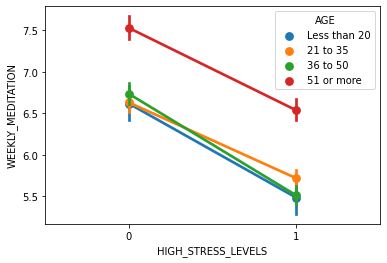

In [24]:
# More meditation and relaxation activities, more zen => Lesser stress?
sns.pointplot(data=lifestyle_n_wellbeing_pdf, x="HIGH_STRESS_LEVELS", y="WEEKLY_MEDITATION", hue="AGE",
             hue_order=["Less than 20", "21 to 35", "36 to 50", "51 or more"]);
# People who do meditation and think about themselves often have lower stress levels.
# The older age group does meditation and relaxation activities often.

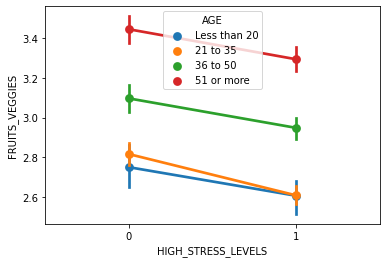

In [25]:
# Does eating more fruits and vegetables help in reducing stress levels => healthier, lesser stress?
sns.pointplot(data=lifestyle_n_wellbeing_pdf, x="HIGH_STRESS_LEVELS", y="FRUITS_VEGGIES", hue="AGE",
             hue_order=["Less than 20", "21 to 35", "36 to 50", "51 or more"]);
# Older age groups consume more fruits and vegetables.
# To a small extent, eating more fruits and vegetables does help in lowering stress levels.

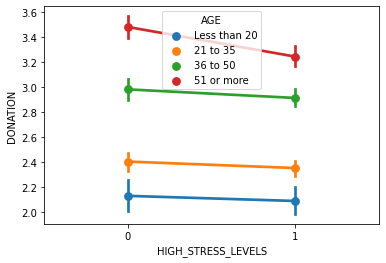

In [26]:
# Does donation help with stress levels?
sns.pointplot(data=lifestyle_n_wellbeing_pdf, x="HIGH_STRESS_LEVELS", y="DONATION", hue="AGE",
             hue_order=["Less than 20", "21 to 35", "36 to 50", "51 or more"]);
# Not really. The older age groups donate or do voluntary work more.

In [27]:
# Drop the Timestamp column
lifestyle_n_wellbeing_pdf = lifestyle_n_wellbeing_pdf.drop(columns=["Timestamp"])

In [28]:
# Create dummy variables for GENDER
lifestyle_n_wellbeing_pdf = pd.get_dummies(lifestyle_n_wellbeing_pdf, columns=["GENDER"], drop_first=True)
lifestyle_n_wellbeing_pdf.head()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,HIGH_STRESS_LEVELS,GENDER_Male
0,3,2,5,0,5,2,0,1,6,4,...,7,5,5,1,4,0,5,36 to 50,0,0
1,2,4,3,8,10,5,2,2,5,2,...,8,2,2,2,3,2,6,36 to 50,1,0
2,2,3,4,4,10,3,2,2,2,2,...,8,10,2,2,4,8,3,36 to 50,1,0
3,3,10,3,10,7,2,5,2,3,5,...,5,7,5,1,5,2,0,51 or more,1,0
4,5,3,3,10,4,2,4,2,5,0,...,7,0,0,2,8,1,5,51 or more,0,0


In [29]:
# Ordered categorical variable so change it to 1 to 4.
lifestyle_n_wellbeing_pdf["AGE"] = lifestyle_n_wellbeing_pdf["AGE"].map({"Less than 20": 1, "21 to 35": 2, "36 to 50": 3, "51 or more": 4})

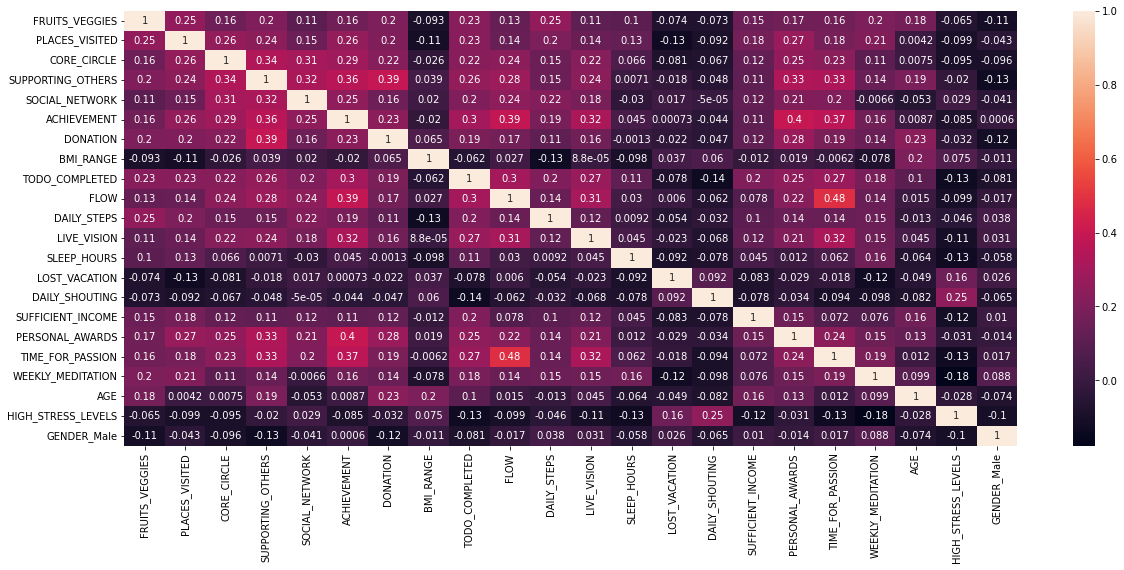

In [30]:
plt.figure(figsize=(20, 8))
sns.heatmap(lifestyle_n_wellbeing_pdf.corr(), annot=True);

Factors that are more strongly correlated to HIGH_STRESS_LEVELS are:
- DAILY_SHOUTING: More shouting, higher stress
- WEEKLY_MEDITATION: More meditation, lesser stress
- LOST_VACATION: More lost vacation, higher stress
- TODO_COMPLETED, SLEEP_HOURS, TIME_FOR_PASSION: More todo completed, sleep hours, time for passion, lesser stress
- SUFFICIENT_INCOME: More sufficient income, lesser stress
- LIVE_VISION: The clearer you are about the future, lesser stress
- GENDER_Male: If you are a female, you likely have higher stress

Factors that don't really correlated to HIGH_STRESS_LEVELS are:
- PLACES_VISITED, FLOW
- CORE_CIRCLE
- ACHIEVEMENT
- BMI_RANGE
- FRUITS_VEGGIES
- DAILY_STEPS
- DONATION
- PERSONAL_AWARDS
- SOCIAL_NETWORK
- AGE
- SUPPORTING_OTHERS

### Modelling

In [31]:
# Use all features for model
target_col = "HIGH_STRESS_LEVELS"
feature_cols = [col for col in list(lifestyle_n_wellbeing_pdf.columns) if col != target_col]

In [32]:
X = lifestyle_n_wellbeing_pdf[feature_cols]
y = lifestyle_n_wellbeing_pdf["HIGH_STRESS_LEVELS"]

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

In [34]:
# Create train/test split instead of scaling first => will reveal information about testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
# Null F1-score
most_freq_class = y_train.value_counts().index[0]
print(f"The most frequent class: {most_freq_class}")

counts_per_class = y_test.value_counts()
print(f"Null Accuracy: {counts_per_class[most_freq_class] / len(y_test)}")

# F1 score = 2tp / (2tp + fp + fn)
least_freq_class = y_train.value_counts().index[1]
null_f1 = (2 * counts_per_class[most_freq_class]) / ((2 * counts_per_class[most_freq_class]) + counts_per_class[least_freq_class])
print(f"Null F1-score: {null_f1}")

The most frequent class: 1
Null Accuracy: 0.5899843505477308
Null F1-score: 0.7421259842519685


In [36]:
# Standardise features
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [37]:
# Model #1: KNN
knn = KNeighborsClassifier()

param_grid = dict(n_neighbors=[23, 25, 29, 31], metric=["euclidean", "manhattan", "minkowski"], weights=["uniform", "distance"])

# F1 score is chosen to look at the false positives and negatives.
grid_search_knn = GridSearchCV(knn, param_grid, scoring="f1", cv=8)
grid_search_knn.fit(X_train_ss, y_train)

print(f"Best param: {grid_search_knn.best_params_}")
print(f"Best f1 score: {grid_search_knn.best_score_}")

Best param: {'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'distance'}
Best f1 score: 0.7397631635285438


In [38]:
knn_best_param = KNeighborsClassifier(n_neighbors=29, metric="euclidean", weights="distance")
print(f"ROC_AUC: {np.mean(cross_val_score(knn_best_param, X_train_ss, y_train, cv=8, scoring='roc_auc'))}")
print(f"Precision: {np.mean(cross_val_score(knn_best_param, X_train_ss, y_train, cv=8, scoring='precision'))}")
print(f"Recall: {np.mean(cross_val_score(knn_best_param, X_train_ss, y_train, cv=8, scoring='recall'))}")

ROC_AUC: 0.7198850590889833
Precision: 0.6975571129639868
Recall: 0.7875059352883984


In [47]:
# Model #2: Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
param_grid = dict(C=[0.001, 0.01, 0.1, 1, 10, 100])

# F1 score is chosen to look at the false positives and negatives.
grid_search_lr = GridSearchCV(logreg, param_grid, scoring="f1", cv=8)
grid_search_lr.fit(X_train_ss, y_train)

print(f"Best param: {grid_search_lr.best_params_}")
print(f"Best f1 score: {grid_search_lr.best_score_}")

Best param: {'C': 0.001}
Best f1 score: 0.7484601242610075


In [40]:
lr_best_param = LogisticRegression(C=0.001)
print(f"ROC_AUC: {np.mean(cross_val_score(lr_best_param, X_train_ss, y_train, cv=8, scoring='roc_auc'))}")
print(f"Precision: {np.mean(cross_val_score(lr_best_param, X_train_ss, y_train, cv=8, scoring='precision'))}")
print(f"Recall: {np.mean(cross_val_score(lr_best_param, X_train_ss, y_train, cv=8, scoring='recall'))}")

ROC_AUC: 0.7173976761461229
Precision: 0.6842049536958084
Recall: 0.8261795679110047


#### Comparison

| Model | F1 score | ROC AUC | Precision | Recall |
| --- | --- | --- | --- | --- |
| KNN | 0.74 | 0.72 | 0.7 | 0.79 |
| Logistic Regression | 0.75 | 0.72 | 0.68 | 0.83 |

Chosen model: Logistic Regression - slightly higher F1 score and has a higher recall score even though the precision is lower. The cost of false negatives is important as we want to flag up as many potentially stressed candidates as possible.

#### Choose threshold

In [41]:
lr_best_param.fit(X_train_ss, y_train)
print(f"Score: {lr_best_param.score(X_train_ss, y_train)}")

Score: 0.6745460237946149


In [42]:
y_pred_05 = lr_best_param.predict_proba(X_train_ss)[:, 1] >= 0.5

precision_score_05 = metrics.precision_score(y_train, y_pred_05)
print(f"Precision: {precision_score_05}")
recall_score_05 = metrics.recall_score(y_train, y_pred_05)
print(f"Recall: {recall_score_05}")
print(f"F1: {metrics.f1_score(y_train, y_pred_05)}")

Precision: 0.6865373961218837
Recall: 0.8233887043189368
F1: 0.748761329305136


In [43]:
y_pred_04 = lr_best_param.predict_proba(X_train_ss)[:, 1] >= 0.4

precision_score_04 = metrics.precision_score(y_train, y_pred_04)
print(f"Precision: {precision_score_04}")
recall_score_04 = metrics.recall_score(y_train, y_pred_04)
print(f"Recall: {recall_score_04}")
print(f"F1: {metrics.f1_score(y_train, y_pred_04)}")

Precision: 0.6289213958406767
Recall: 0.9484385382059801
F1: 0.7563185503099666


In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, lr_best_param.predict_proba(X_train_ss)[:, 1])

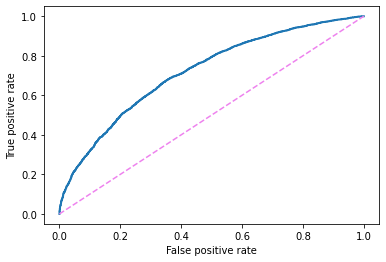

In [45]:
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], c="violet", ls="--");
plt.xlabel("False positive rate");
plt.ylabel("True positive rate");

Pick threshold to be 0.4 since true positive rate only drops a little.

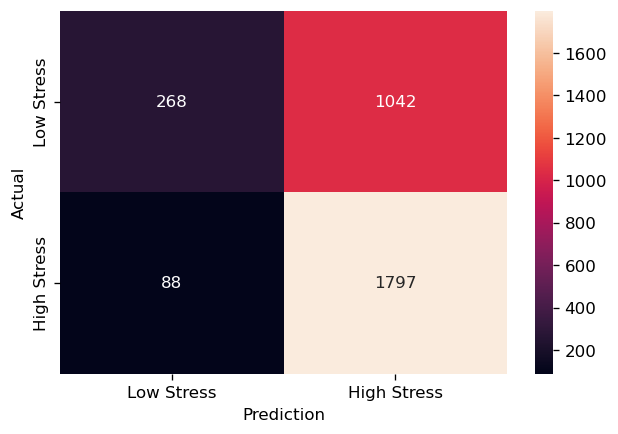

In [46]:
y_predict = lr_best_param.predict_proba(X_test_ss)[:, 1] >= 0.4
plt.figure(dpi=120)
confusion_mx = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_mx, annot=True, xticklabels=["Low Stress", "High Stress"],
           yticklabels=["Low Stress", "High Stress"], fmt="d");
plt.xlabel("Prediction");
plt.ylabel("Actual");

Although there are a large amount of people surfaced as having high stress levels despite having low stress levels, the number of False Negatives is low. This is ok as we want to surface potentially stressed people.

#### Recommendations
This can be implemented as a stress-risk/wellbeing assessment for companies to determine if their employees need a break or they need to learn how to relax more => to see there is a need to introduce courses/workshops for the employees to learn how to improve their mental wellbeing.